# Gerekli kütüphanelerin importu

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Veri setinin yüklenmesi ve optimize edilmesi

In [4]:
# Veri setini yükle
file_path = './data.txt'
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
    'BMI', 'DiabetesPF', 'Age', 'IsDiabet'
]
data = pd.read_csv(file_path, delimiter='\t', names=column_names)

# Eksik değerleri doldurma (0 olan değerleri median ile değiştirme)

# Eksik değerlerin kontrolü
missing_values = data.isnull().sum()
print("Eksik değerler:\n", missing_values)

# Eksik değerleri medyan ile doldurma (örnek olarak)
data_filled = data.fillna(data.median())

# Veri setini standardize etme
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_filled.iloc[:, :-1]), columns=column_names[:-1])
data_scaled['IsDiabet'] = data['IsDiabet']

# Min-Max Ölçekleme
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns=column_names)

print("\n\nEksik Değerleri Medyan'la Değiştirilmiş, Standardize Edilmiş ve Daha Sonra Min Max Ölçeklenmiş Veri Tablosu: \n")
df_scaled.head()

Eksik değerler:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DiabetesPF       0
Age              0
IsDiabet         0
dtype: int64


Eksik Değerleri Medyan'la Değiştirilmiş, Standardize Edilmiş ve Daha Sonra Min Max Ölçeklenmiş Veri Tablosu: 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPF,Age,IsDiabet
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


# Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM)

Veri setinin ayrılması

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled.iloc[:, :-1], df_scaled['IsDiabet'], test_size=0.3, random_state=9988)

# MLP

Oluşturma, eğitme ve tahmin

In [10]:
# MLP modeli oluşturma ve eğitme
mlp_model = MLPClassifier(random_state=9988, max_iter=1000)
mlp_model.fit(X_train, y_train)

# Tahmin
y_pred_mlp = mlp_model.predict(X_test)

Sonuçların Yazdırılması

In [12]:
# Sonuçlar
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print("Multi-Layer Perceptron Sonuçları:\n")
print(f"Doğruluk (Accuracy): {accuracy_mlp}")
print(f"Hassasiyet (Precision): {precision_mlp}")
print(f"Duyarlılık (Recall): {recall_mlp}")
print(f"F1 Skoru: {f1_mlp}")
print(f"Karışıklık Matrisi:\n{conf_matrix_mlp}\n")

Multi-Layer Perceptron Sonuçları:

Doğruluk (Accuracy): 0.7878787878787878
Hassasiyet (Precision): 0.6818181818181818
Duyarlılık (Recall): 0.6164383561643836
F1 Skoru: 0.6474820143884891
Karışıklık Matrisi:
[[137  21]
 [ 28  45]]



Matplotlib Kütüphanesi ile görselleştirilme

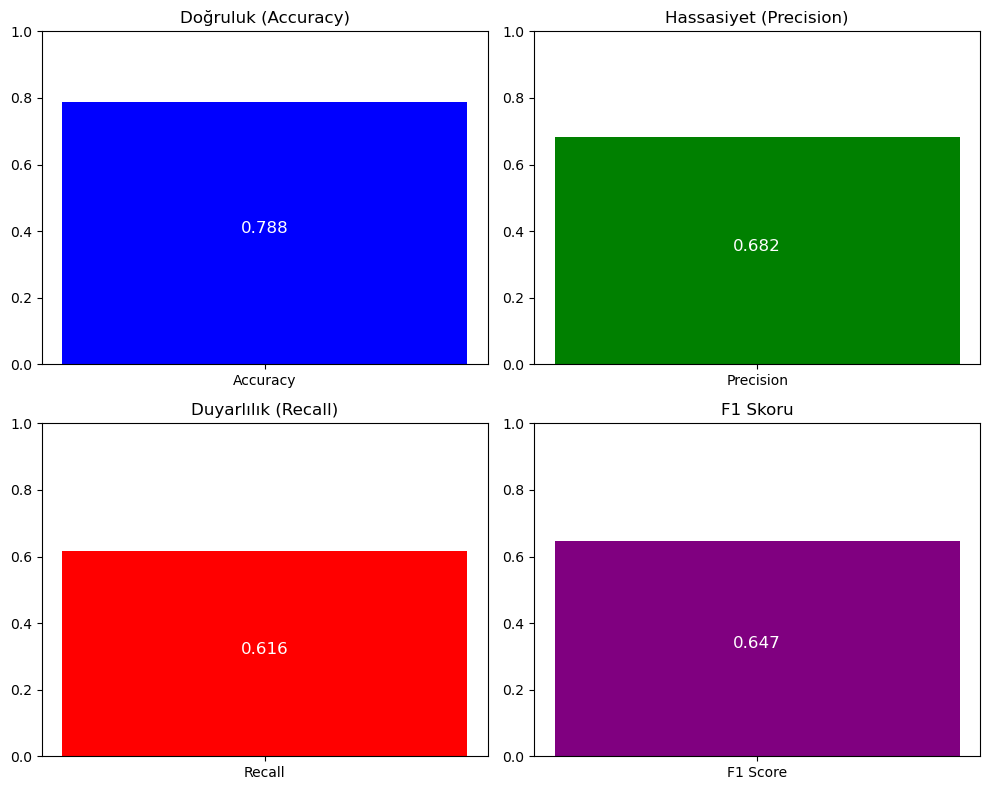

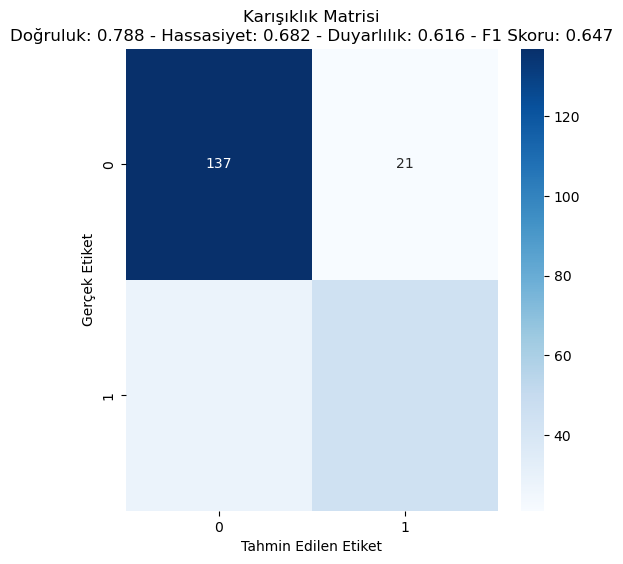

In [14]:
# Figür oluşturma
plt.figure(figsize=(10, 8))

# Doğruluk (Accuracy)
plt.subplot(2, 2, 1)
plt.bar(['Accuracy'], [accuracy_mlp], color='blue')
plt.ylim(0, 1)
plt.title('Doğruluk (Accuracy)')
for i in range(len([accuracy_mlp])):
    plt.text(i, [accuracy_mlp][i] / 2, f'{[accuracy_mlp][i]:.3f}', ha='center', color='white', fontsize=12)

# Hassasiyet (Precision)
plt.subplot(2, 2, 2)
plt.bar(['Precision'], [precision_mlp], color='green')
plt.ylim(0, 1)
plt.title('Hassasiyet (Precision)')
for i in range(len([precision_mlp])):
    plt.text(i, [precision_mlp][i] / 2, f'{[precision_mlp][i]:.3f}', ha='center', color='white', fontsize=12)

# Duyarlılık (Recall)
plt.subplot(2, 2, 3)
plt.bar(['Recall'], [recall_mlp], color='red')
plt.ylim(0, 1)
plt.title('Duyarlılık (Recall)')
for i in range(len([recall_mlp])):
    plt.text(i, [recall_mlp][i] / 2, f'{[recall_mlp][i]:.3f}', ha='center', color='white', fontsize=12)

# F1 Skoru (F1 Score)
plt.subplot(2, 2, 4)
plt.bar(['F1 Score'], [f1_mlp], color='purple')
plt.ylim(0, 1)
plt.title('F1 Skoru')
for i in range(len([f1_mlp])):
    plt.text(i, [f1_mlp][i] / 2, f'{[f1_mlp][i]:.3f}', ha='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()

# Karışıklık Matrisi
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title(f'Karışıklık Matrisi\nDoğruluk: {accuracy_mlp:.3f} - Hassasiyet: {precision_mlp:.3f} - Duyarlılık: {recall_mlp:.3f} - F1 Skoru: {f1_mlp:.3f}')
plt.show()

# SVM

Oluşturma, eğitme ve tahmin

In [17]:
# SVM modeli oluşturma ve eğitme
svm_model = SVC(random_state=9988, max_iter=1000)
svm_model.fit(X_train, y_train)

# Tahmin
y_pred_svm = svm_model.predict(X_test)

Sonuçların Yazdırılması

In [19]:
# Sonuçlar
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("Support Vector Machines Sonuçları:\n")
print(f"Doğruluk (Accuracy): {accuracy_svm}")
print(f"Hassasiyet (Precision): {precision_svm}")
print(f"Duyarlılık (Recall): {recall_svm}")
print(f"F1 Skoru: {f1_svm}")
print(f"Karışıklık Matrisi:\n{conf_matrix_svm}\n")

Support Vector Machines Sonuçları:

Doğruluk (Accuracy): 0.8138528138528138
Hassasiyet (Precision): 0.7678571428571429
Duyarlılık (Recall): 0.589041095890411
F1 Skoru: 0.6666666666666666
Karışıklık Matrisi:
[[145  13]
 [ 30  43]]



Matplotlib Kütüphanesi ile görselleştirilme aşaması

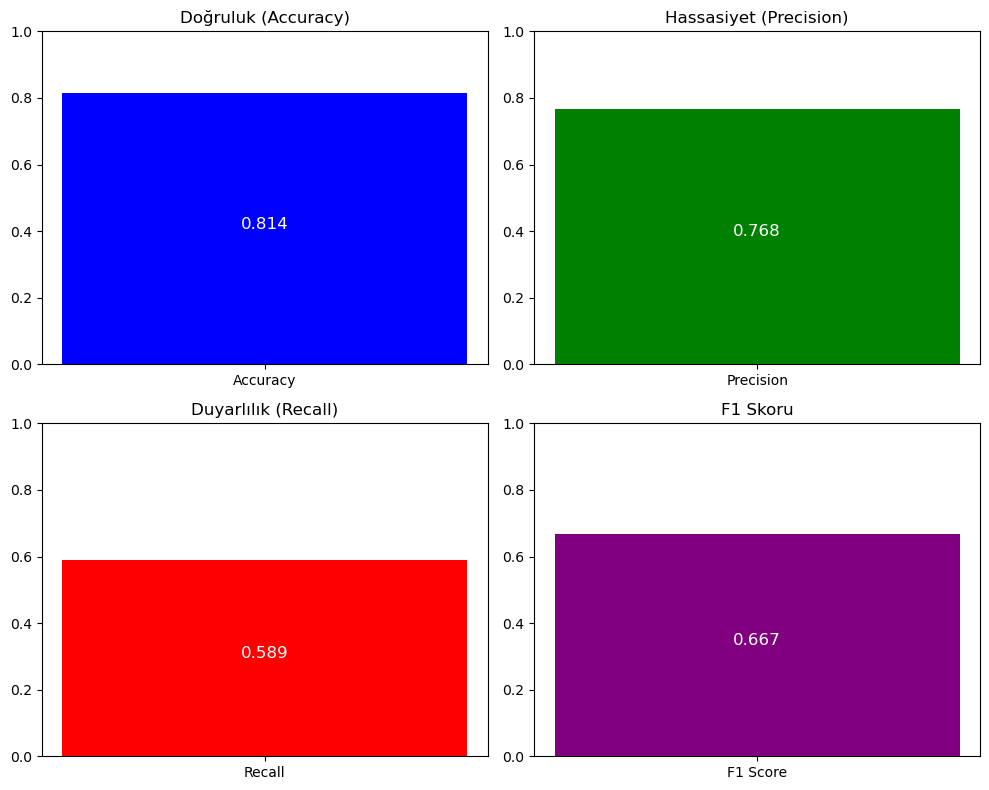

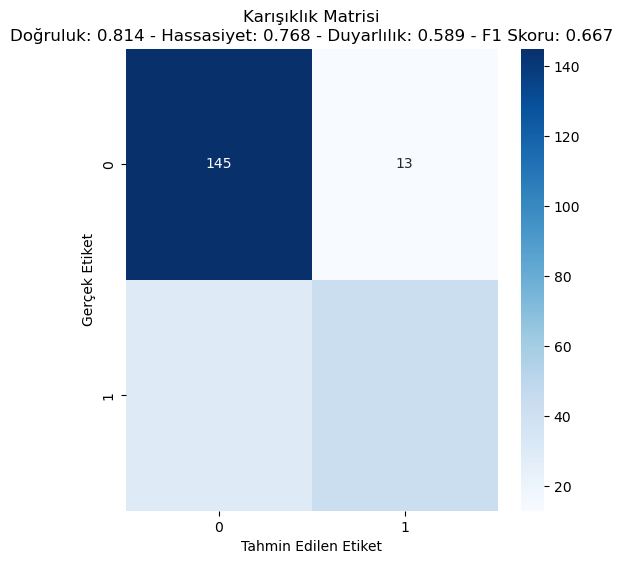

In [21]:
# Figür oluşturma
plt.figure(figsize=(10, 8))

# Doğruluk (Accuracy)
plt.subplot(2, 2, 1)
plt.bar(['Accuracy'], [accuracy_svm], color='blue')
plt.ylim(0, 1)
plt.title('Doğruluk (Accuracy)')
for i in range(len([accuracy_svm])):
    plt.text(i, [accuracy_svm][i] / 2, f'{[accuracy_svm][i]:.3f}', ha='center', color='white', fontsize=12)

# Hassasiyet (Precision)
plt.subplot(2, 2, 2)
plt.bar(['Precision'], [precision_svm], color='green')
plt.ylim(0, 1)
plt.title('Hassasiyet (Precision)')
for i in range(len([precision_svm])):
    plt.text(i, [precision_svm][i] / 2, f'{[precision_svm][i]:.3f}', ha='center', color='white', fontsize=12)

# Duyarlılık (Recall)
plt.subplot(2, 2, 3)
plt.bar(['Recall'], [recall_svm], color='red')
plt.ylim(0, 1)
plt.title('Duyarlılık (Recall)')
for i in range(len([recall_svm])):
    plt.text(i, [recall_svm][i] / 2, f'{[recall_svm][i]:.3f}', ha='center', color='white', fontsize=12)

# F1 Skoru (F1 Score)
plt.subplot(2, 2, 4)
plt.bar(['F1 Score'], [f1_svm], color='purple')
plt.ylim(0, 1)
plt.title('F1 Skoru')
for i in range(len([f1_svm])):
    plt.text(i, [f1_svm][i] / 2, f'{[f1_svm][i]:.3f}', ha='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()

# Karışıklık Matrisi
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title(f'Karışıklık Matrisi\nDoğruluk: {accuracy_svm:.3f} - Hassasiyet: {precision_svm:.3f} - Duyarlılık: {recall_svm:.3f} - F1 Skoru: {f1_svm:.3f}')
plt.show()